# I. Perkenalan

- Nama  : Ida Ayu Gede Ima Dewi Pertami
- Batch : HCK-004

Problems Statement:
- Mengidentifikasi dan menganalisis kinerja pengiriman (shipping) produk selama periode Q1 - Q2 2023.
(Q1 (Quarter 1): kuartal pertama dalam satu tahun dan mencakup tiga bulan dari Januari hingga Maret. Kuartal ini dimulai pada tanggal 1 Januari dan berakhir pada tanggal 31 Maret. Q2 (Quarter 2): kuartal kedua dalam satu tahun dan mencakup tiga bulan dari April hingga Juni. Kuartal ini dimulai pada tanggal 1 April dan berakhir pada tanggal 30 Juni.)

Objective :
- Memahami tren dan pola penjualan produk selama Q1 - Q2 2023 (termasuk total produk terjual, rata-rata penjualan harian/mingguan/bulanan, dan produk terlaris).
- Memahami performa pengiriman produk (termasuk total pesanan yang dikirim dan jumlah pesanan yang terlambat dikirim).
- Mengidentifikasi produk yang paling sering mengalami pengembalian.
- Memahami performa pesanan berdasarkan status (sudah dikirim, sudah diterima, sudah dikembalikan).

Penjabaran masalah :
- Dalam analisis "Shipping and Stock Performance Review on Q1 - Q2 2023", saya akan menggunakan data dari database BigQuery "thelook_ecommerce". Data ini mencakup informasi tentang pesanan produk, termasuk tanggal pembuatan pesanan, tanggal pengiriman, tanggal penerimaan, tanggal pengembalian, status pesanan, harga penjualan, dan informasi produk seperti kategori produk.
- Saya juga akan mengukur total pendapatan yang dihasilkan dari penjualan produk selama periode Q1 - Q2 2023 dan menganalisis performa pesanan berdasarkan status pesanan (sudah dikirim, sudah diterima, sudah dikembalikan). Dengan analisis ini, saya berharap dapat memberikan wawasan yang berharga bagi perusahaan dalam mengoptimalkan performa pengiriman dan stok produk, serta meningkatkan efisiensi dan keuntungan bisnis.

# Query 
- SELECT
  oi.order_id,
  oi.user_id,
  oi.product_id,
  oi.inventory_item_id,
  oi.status AS order_item_status,
  oi.created_at AS order_item_created_at,
  oi.shipped_at AS order_item_shipped_at,
  oi.delivered_at AS order_item_delivered_at,
  oi.returned_at AS order_item_returned_at,
  oi.sale_price,
  inv.product_category,
  o.gender,
  e.state
- FROM
  `bigquery-public-data.thelook_ecommerce.order_items` oi
- INNER JOIN `bigquery-public-data.thelook_ecommerce.inventory_items` inv
  ON oi.inventory_item_id = inv.id
- INNER JOIN `bigquery-public-data.thelook_ecommerce.orders` o
  ON oi.order_id = o.order_id
- INNER JOIN `bigquery-public-data.thelook_ecommerce.events` e
- WHERE
  oi.created_at >= '2023-01-01' AND oi.created_at <= '2023-06-30'

# URL Dashboard
- [Looker Studio](https://lookerstudio.google.com/reporting/33e07984-f4b6-494a-ac85-79b9e884e331)

# II. Import Libraries

- Bagian ini hanya berisi library yang digunakan dalam project

In [1]:
# Libraries untuk memanggil dataset
import pandas as pd
import numpy as np

# Libraries untuk exploratory data analysis
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# III. Data Loading

- Bagian ini berisi proses persiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Loading Data dapat berupa pemberian nama baru untuk setiap kolom, pengecekan ukuran dataset, dll.

In [2]:
# Load dataset dan cek missing value non standard
missing_values = ["n/a", "na", "--", "none", "?", "-"]
df = pd.read_csv('../week_3/bq-results-20230725-122531-1690287980597.csv', na_values = missing_values)

In [3]:
# Menampilkan dataset 5 teratas
df.head()

,order_id,user_id,product_id,inventory_item_id,order_item_status,order_item_created_at,order_item_shipped_at,order_item_delivered_at,order_item_returned_at,sale_price,product_category,gender
0,32009,25456,16898,125867,Processing,2023-01-04 06:55:26 UTC,NaN,NaN,NaN,25.0,Tops & Tees,M
1,64243,51052,16898,251742,Complete,2023-06-09 04:53:22 UTC,2023-06-06 13:53:00 UTC,2023-06-06 16:27:00 UTC,NaN,25.0,Tops & Tees,M
2,70669,56143,16898,276832,Complete,2023-03-29 03:51:38 UTC,2023-03-29 06:24:00 UTC,2023-03-31 04:50:00 UTC,NaN,25.0,Tops & Tees,M
3,119585,95239,16898,468412,Shipped,2023-05-24 12:43:32 UTC,2023-05-27 08:37:00 UTC,NaN,NaN,25.0,Tops & Tees,M
4,122481,97525,16898,479650,Complete,2023-01-26 04:16:28 UTC,2023-01-27 14:52:00 UTC,2023-02-01 03:03:00 UTC,NaN,25.0,Tops & Tees,M


In [4]:
# Menampilkan datatset 5 terbawah
df.tail()

,order_id,user_id,product_id,inventory_item_id,order_item_status,order_item_created_at,order_item_shipped_at,order_item_delivered_at,order_item_returned_at,sale_price,product_category,gender
53805,1288,1053,18150,5112,Cancelled,2023-05-01 03:50:02 UTC,NaN,NaN,NaN,33.000000,Active,M
53806,9593,7550,18150,37580,Complete,2023-02-23 09:47:22 UTC,2023-02-24 18:19:00 UTC,2023-03-01 07:43:00 UTC,NaN,33.000000,Active,M
53807,794,640,9215,3180,Processing,2023-04-12 07:54:28 UTC,NaN,NaN,NaN,9.990000,Socks & Hosiery,F
53808,72019,57247,14581,282297,Cancelled,2023-02-03 23:12:10 UTC,NaN,NaN,NaN,23.000000,Maternity,F
53809,8278,6525,14392,32337,Processing,2023-03-31 15:28:25 UTC,NaN,NaN,NaN,35.720001,Maternity,F


In [5]:
# Melihat berapa jumlah kolom dan baris
df.shape

(53810, 12)

- Dataset memiliki 53.810 baris dan 12 kolom. 

# IV. Data Preprocessing

- Data Preprocessing adalah tahap awal dalam analisis data yang melibatkan pengolahan dan persiapan data mentah agar sesuai untuk analisis lebih lanjut. Tahap ini sangat penting karena kualitas data yang baik sangat mempengaruhi hasil analisis yang dibangun.
- Beberapa proses yang termasuk dalam Data Preprocessing antara lain: 1. Pembersihan Data (Data Cleaning): Mengidentifikasi dan mengatasi nilai yang hilang (missing values), data duplikat, dan noise (data yang tidak relevan atau tidak akurat). 2. Penanganan Outlier: Mengidentifikasi dan mengatasi outlier, yaitu data yang jauh berbeda dari data lainnya dan dapat mempengaruhi hasil analisis.


In [6]:
# Mencari data duplikasi
df[df.duplicated()].shape

(0, 12)

- Tidak ditemukan data duplikasi pada dataset. Data bersih dan tidak memiliki baris yang sama secara keseluruhan. Data yang bersih dan bebas duplikasi akan memberikan hasil analisis yang lebih akurat dan dapat diandalkan.

In [7]:
# Memeriksa informasi dasar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53810 entries, 0 to 53809
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 53810 non-null  int64  
 1   user_id                  53810 non-null  int64  
 2   product_id               53810 non-null  int64  
 3   inventory_item_id        53810 non-null  int64  
 4   order_item_status        53810 non-null  object 
 5   order_item_created_at    53810 non-null  object 
 6   order_item_shipped_at    35143 non-null  object 
 7   order_item_delivered_at  18908 non-null  object 
 8   order_item_returned_at   5330 non-null   object 
 9   sale_price               53810 non-null  float64
 10  product_category         53810 non-null  object 
 11  gender                   53810 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 4.9+ MB


In [8]:
# Mengubah datetime type pada kolom order_item_created_at, order_item_shipped_at, order_item_delivered_at, order_item_returned_at
df['order_item_created_at'] = pd.to_datetime(df['order_item_created_at'])
df['order_item_shipped_at'] = pd.to_datetime(df['order_item_shipped_at'])
df['order_item_delivered_at'] = pd.to_datetime(df['order_item_delivered_at'])
df['order_item_returned_at'] = pd.to_datetime(df['order_item_returned_at'])

- Mengubah tipe data pada kolom 'order_item_created_at', 'order_item_shipped_at', 'order_item_delivered_at', dan 'order_item_returned_at' menjadi datetime. Dengan tipe data yang sudah benar, maka dapat melakukan analisis waktu dan perhitungan lebih lanjut dengan lebih mudah dan akurat.

In [9]:
# Memeriksa informasi dasar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53810 entries, 0 to 53809
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   order_id                 53810 non-null  int64              
 1   user_id                  53810 non-null  int64              
 2   product_id               53810 non-null  int64              
 3   inventory_item_id        53810 non-null  int64              
 4   order_item_status        53810 non-null  object             
 5   order_item_created_at    53810 non-null  datetime64[ns, UTC]
 6   order_item_shipped_at    35143 non-null  datetime64[ns, UTC]
 7   order_item_delivered_at  18908 non-null  datetime64[ns, UTC]
 8   order_item_returned_at   5330 non-null   datetime64[ns, UTC]
 9   sale_price               53810 non-null  float64            
 10  product_category         53810 non-null  object             
 11  gender                   538

In [10]:
# Mencari missing value
df.isnull().sum()

order_id                       0
user_id                        0
product_id                     0
inventory_item_id              0
order_item_status              0
order_item_created_at          0
order_item_shipped_at      18667
order_item_delivered_at    34902
order_item_returned_at     48480
sale_price                     0
product_category               0
gender                         0
dtype: int64

- Dari hasil di atas, kita dapat melihat jumlah missing value pada masing-masing kolom sebagai berikut:
  - Kolom 'order_item_shipped_at' memiliki 18667 missing value.
  - Kolom 'order_item_delivered_at' memiliki 34902 missing value.
  - Kolom 'order_item_returned_at' memiliki 48480 missing value.
- Ketiga kolom tersebut memiliki jumlah missing value yang cukup signifikan, sehingga perlu dipertimbangkan untuk melakukan imputasi atau penghapusan data yang kosong agar tidak mempengaruhi analisis dan hasil dari data.

In [11]:
# Melihat persentase missing value pada masing-masing kolom dan menghitung total persentase missing values pada data set
missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage)

total_missing = df.isna().sum().sum()
percentage_missing = (total_missing / (df.shape[0] * df.shape[1])) * 100
print(f"Persentase keseluruhan missing values di DataFrame adalah: {percentage_missing:.2f}%")

order_id                    0.000000
user_id                     0.000000
product_id                  0.000000
inventory_item_id           0.000000
order_item_status           0.000000
order_item_created_at       0.000000
order_item_shipped_at      34.690578
order_item_delivered_at    64.861550
order_item_returned_at     90.094778
sale_price                  0.000000
product_category            0.000000
gender                      0.000000
dtype: float64
Persentase keseluruhan missing values di DataFrame adalah: 15.80%


- Dari hasil di atas, kita dapat melihat persentase missing value pada masing-masing kolom sebagai berikut:
  - Kolom 'order_item_shipped_at' memiliki sekitar 34.69% missing value.
  - Kolom 'order_item_delivered_at' memiliki sekitar 64.86% missing value.
  - Kolom 'order_item_returned_at' memiliki sekitar 90.09% missing value.
- Total persentase keseluruhan missing values pada keseluruhan dataset adalah sekitar 15.80%. Hal ini penting untuk diperhatikan karena missing values dapat mempengaruhi analisis dan hasil yang kita dapatkan dari data. Jika missing values signifikan, perlu dipertimbangkan apakah akan dilakukan imputasi atau penghapusan data yang kosong tersebut.

In [12]:
# Imputasi berdasarkan pola data dari kolom lain (order_item_created_at)
df['order_item_shipped_at'].fillna(df['order_item_created_at'], inplace=True)
df['order_item_delivered_at'].fillna(df['order_item_created_at'], inplace=True)
df['order_item_returned_at'].fillna(df['order_item_created_at'], inplace=True)

- Dilakukan imputasi (pengisian nilai kosong) pada kolom 'order_item_shipped_at', 'order_item_delivered_at', dan 'order_item_returned_at' menggunakan nilai dari kolom 'order_item_created_at'. Artinya, jika terdapat nilai kosong pada kolom 'order_item_shipped_at', 'order_item_delivered_at', atau 'order_item_returned_at', maka nilai tersebut akan diisi dengan nilai dari kolom 'order_item_created_at'. Dengan menggunakan pola data dari kolom 'order_item_created_at', kita dapat mengisi nilai kosong pada kolom lainnya untuk menjaga konsistensi data.
- Jika ketiga kolom yang terdapat missing values di drop, maka data order_item_status hanya tersisa yang berstatus Returned, sehingga missing value diganti dengan data yang ada di order_item_created_at atau handling missing values dengan cara imputasi.

In [13]:
# Melihat kembali jumlah missing values
(df.isnull().values.sum())

0

- Hasil menunjukkan bahwa tidak ada nilai yang hilang (missing values) pada dataset tersebut, karena total nilai missing values adalah 0. Artinya, seluruh data pada setiap kolom pada dataset telah terisi dengan lengkap dan tidak ada data yang kosong.

4.930301356423138


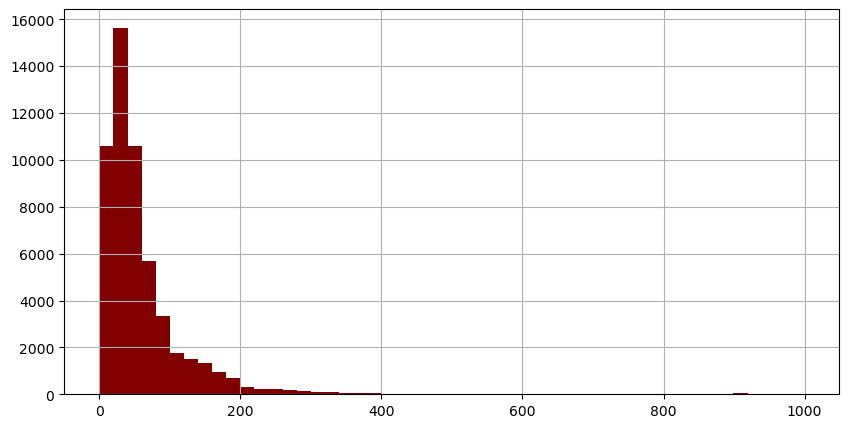

In [14]:
# Mencari nilai skew dari sale_price
print(df['sale_price'].skew())
df['sale_price'].hist(bins=50, figsize=(10,5), color='maroon')
plt.show()

In [15]:
# Membuat function untuk handling outlier
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=20)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

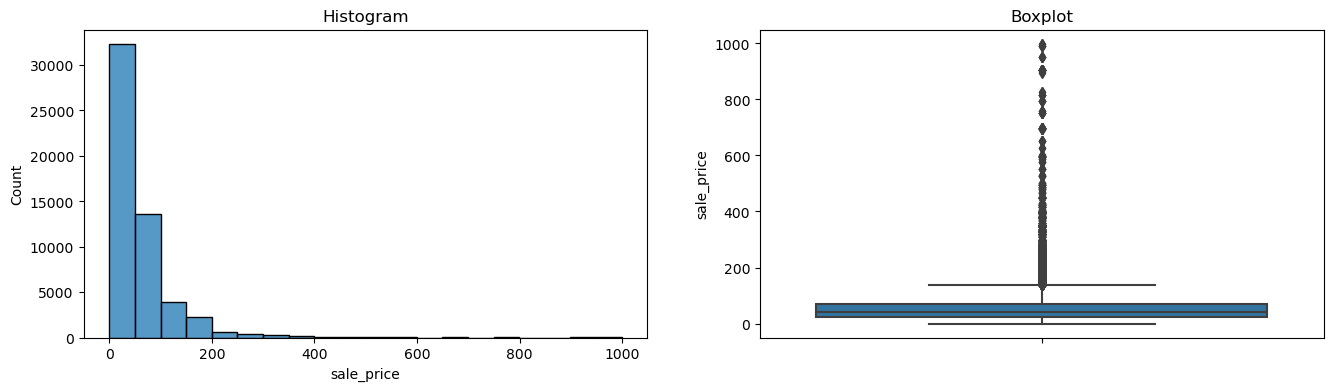


Skewness Value sale_price :  4.930301356423138


In [16]:
# Cek skew dan outlier pada dataset yang menjadi fitur dengan boxplot dan histogram
diagnostic_plots(df, 'sale_price')
print('\nSkewness Value sale_price : ', df['sale_price'].skew())

- Dari hasil analisis, terlihat bahwa kolom "sale_price" memiliki skewness yang cukup tinggi, yaitu sekitar 4.93. Skewness yang tinggi menunjukkan bahwa distribusi data cenderung miring ke kanan (positively skewed), artinya ekor distribusi berada di sebelah kanan.

In [17]:
# Menghitung outliers pada kolom sale_price dengan IQR
Q1 = df['sale_price'].quantile(.25)
Q3 = df['sale_price'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = df[(df['sale_price'] <= lower) | (df['sale_price'] >= upper)]

print('Persentase outliers pada kolom sale_price: ', len(outlier)/df.shape[0] * 100, '%')
print('Upper boundary: ', upper)
print('Lower boundary: ', lower)

Persentase outliers pada kolom sale_price:  2.86563835718268 %
Upper boundary:  204.9499855041504
Lower boundary:  -110.04998779296875


Dari perhitungan menggunakan metode IQR (Interquartile Range), diperoleh hasil sebagai berikut:
- Persentase outliers pada kolom "sale_price" adalah sekitar 2.87%. Ini menunjukkan bahwa sekitar 2.87% dari total data memiliki nilai "sale_price" yang dianggap sebagai outlier berdasarkan metode IQR.
- Upper boundary (batas atas) untuk outliers adalah sebesar 204.95.
- Lower boundary (batas bawah) untuk outliers adalah sebesar -110.05.

Outliers adalah data yang berada di luar batas atas dan batas bawah yang ditentukan menggunakan IQR. Outliers dapat mempengaruhi analisis dan pemodelan data, oleh karena itu, penting untuk memperhatikan dan memahami kemungkinan nilai-nilai yang dianggap sebagai outlier saat melakukan analisis data.

# V. Exploratory Data Analysis (EDA)

- Bagian ini berisi eksplorasi data pada dataset di atas dengan menggunakan query, pengelompokan, visualisasi sederhana, dan sebagainya.
- Dikutip dari medium.com, Exploratory Data Analysis (EDA) merupakan bagian dari proses data science. EDA sangat penting sebelum melakukan feature engineering dan modeling karena pada tahap ini kita harus memahami data terlebih dahulu.
- Untuk EDA, saya sajikan beberapa visualisasi histogram dan visualisasi untuk informasi data kategorik berupa diagram batang dan diagram lingkaran.

In [18]:
# Melihat nilai unik pada masing-masing kolom
for i in df:
    print(i, ':', df[i].unique(), '\n')

order_id : [32009 64243 70669 ...  1288  9593   794] 

user_id : [25456 51052 56143 ... 82077  1053   640] 

product_id : [16898  9482 25135 ...  9215 14581 14392] 

inventory_item_id : [125867 251742 276832 ...   3180 282297  32337] 

order_item_status : ['Processing' 'Complete' 'Shipped' 'Cancelled' 'Returned'] 

order_item_created_at : <DatetimeArray>
['2023-01-04 06:55:26+00:00', '2023-06-09 04:53:22+00:00',
 '2023-03-29 03:51:38+00:00', '2023-05-24 12:43:32+00:00',
 '2023-01-26 04:16:28+00:00', '2023-06-20 04:13:40+00:00',
 '2023-06-15 23:18:59+00:00', '2023-06-16 16:51:19+00:00',
 '2023-01-08 09:03:39+00:00', '2023-02-28 05:02:46+00:00',
 ...
 '2023-01-18 05:02:18+00:00', '2023-03-04 03:17:24+00:00',
 '2023-04-20 23:42:20+00:00', '2023-01-24 02:15:48+00:00',
 '2023-01-28 05:25:07+00:00', '2023-05-01 03:50:02+00:00',
 '2023-02-23 09:47:22+00:00', '2023-04-12 07:54:28+00:00',
 '2023-02-03 23:12:10+00:00', '2023-03-31 15:28:25+00:00']
Length: 53709, dtype: datetime64[ns, UTC] 

orde

In [19]:
# Menampilkan deskripsi pada DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,53810.0,62490.946385,36441.791837,1.00,30654.000000,62670.000000,94292.500000,125631.0
user_id,53810.0,49675.743839,28993.344624,1.00,24349.000000,49831.000000,74908.750000,99997.0
product_id,53810.0,15307.838209,8410.115741,1.00,8047.000000,16049.500000,22577.750000,29120.0
inventory_item_id,53810.0,244965.799758,142626.846474,2.00,120411.750000,245559.000000,369461.000000,491884.0
sale_price,53810.0,59.971799,67.275371,0.02,24.950001,39.990002,69.949997,999.0


- Deskripsi statistik ini memberikan gambaran mengenai statistik dasar dari tiap kolom pada DataFrame tersebut, seperti jumlah data (count), rata-rata (mean), standar deviasi, nilai minimum dan maksimum, quartil 25%, quartil 50% (median), serta quartil 75%. Informasi ini dapat membantu dalam memahami karakteristik data dan memberikan insight awal tentang distribusi data yang ada dalam DataFrame tersebut.

In [20]:
# Menghitung total produk yang terjual
total_products_sold = df['product_id'].count()
print("Total Produk Terjual:", total_products_sold)

# Menghitung total pesanan dengan status 'Processing'
total_processing_orders = df[df['order_item_status'] == 'Processing']['order_item_status'].count()
print("Total Pesanan dengan Status 'Processing':", total_processing_orders)

# Menghitung total pesanan dengan status 'Complete'
total_complete_orders = df[df['order_item_status'] == 'Complete']['order_item_status'].count()
print("Total Pesanan dengan Status 'Complete':", total_complete_orders)

# Menghitung total pesanan dengan status 'Shipped'
total_shipped_orders = df[df['order_item_status'] == 'Shipped']['order_item_status'].count()
print("Total Pesanan dengan Status 'Shipped':", total_shipped_orders)

# Menghitung total pesanan dengan status 'Cancelled'
total_cancelled_orders = df[df['order_item_status'] == 'Cancelled']['order_item_status'].count()
print("Total Pesanan dengan Status 'Cancelled':", total_cancelled_orders)

# Menghitung total pesanan dengan status 'Returned'
total_returned_orders = df[df['order_item_status'] == 'Returned']['order_item_status'].count()
print("Total Pesanan dengan Status 'Returned':", total_returned_orders)

Total Produk Terjual: 53810
Total Pesanan dengan Status 'Processing': 10661
Total Pesanan dengan Status 'Complete': 13578
Total Pesanan dengan Status 'Shipped': 16235
Total Pesanan dengan Status 'Cancelled': 8006
Total Pesanan dengan Status 'Returned': 5330


Berikut keterangan dari hasil di atas:
- Total Produk Terjual adalah jumlah keseluruhan produk yang telah terjual.
- Total Pesanan dengan Status 'Processing' adalah jumlah pesanan yang sedang dalam proses pengolahan atau belum selesai diproses.
- Total Pesanan dengan Status 'Complete' adalah jumlah pesanan yang telah selesai diproses dan siap untuk dikirim.
- Total Pesanan dengan Status 'Shipped' adalah jumlah pesanan yang telah dikirim.
- Total Pesanan dengan Status 'Cancelled' adalah jumlah pesanan yang dibatalkan.
- Total Pesanan dengan Status 'Returned' adalah jumlah pesanan yang mengalami pengembalian.

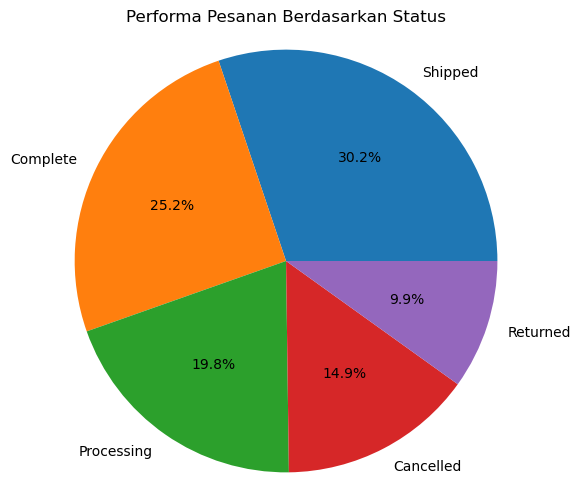

In [21]:
# Menghitung jumlah pesanan berdasarkan status (order_item_status)
order_status_count = df['order_item_status'].value_counts()

# Membuat plot menggunakan Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(order_status_count.values, labels=order_status_count.index, autopct='%1.1f%%')
plt.title('Performa Pesanan Berdasarkan Status')
plt.axis('equal')  # Membuat lingkaran berbentuk bulat
plt.show()


Berikut adalah hasil dari performa pesanan berdasarkan status (order_item_status) dalam bentuk persentase:
- Pesanan dengan Status 'Processing' : 19.8%
- Pesanan dengan Status 'Complete' : 25.2%
- Pesanan dengan Status 'Shipped' : 30.2%
- Pesanan dengan Status 'Cancelled' : 14.9%
- Pesanan dengan Status 'Returned' : 9.9%

Diagram Pie Chart di atas memvisualisasikan persentase dari masing-masing status pesanan dalam keseluruhan data. Dari diagram tersebut, dapat dilihat bahwa mayoritas pesanan telah mencapai status 'Shipped', diikuti oleh 'Complete' dan 'Processing'. Sementara itu, persentase pesanan yang dibatalkan ('Cancelled') dan mengalami pengembalian ('Returned') relatif lebih rendah dibandingkan dengan status lainnya.

In [22]:
# Filter data untuk periode Q1 - Q2 2023
q1_q2_2023_data = df[(df['order_item_created_at'].dt.year == 2023) & (df['order_item_created_at'].dt.quarter.isin([1, 2]))]

# Menghitung total pendapatan dari penjualan produk selama periode tersebut
total_revenue_q1_q2_2023 = q1_q2_2023_data['sale_price'].sum()

# Menampilkan hasil
print("Total Pendapatan dari Penjualan Produk selama Q1 - Q2 2023:", total_revenue_q1_q2_2023)

Total Pendapatan dari Penjualan Produk selama Q1 - Q2 2023: 3227082.503272433


- Total pendapatan dari penjualan produk selama periode Q1 - Q2 2023 adalah sebesar 3,227,082.50. Jumlah ini mencakup total penjualan dari semua produk yang tercatat dalam data pada periode tersebut.

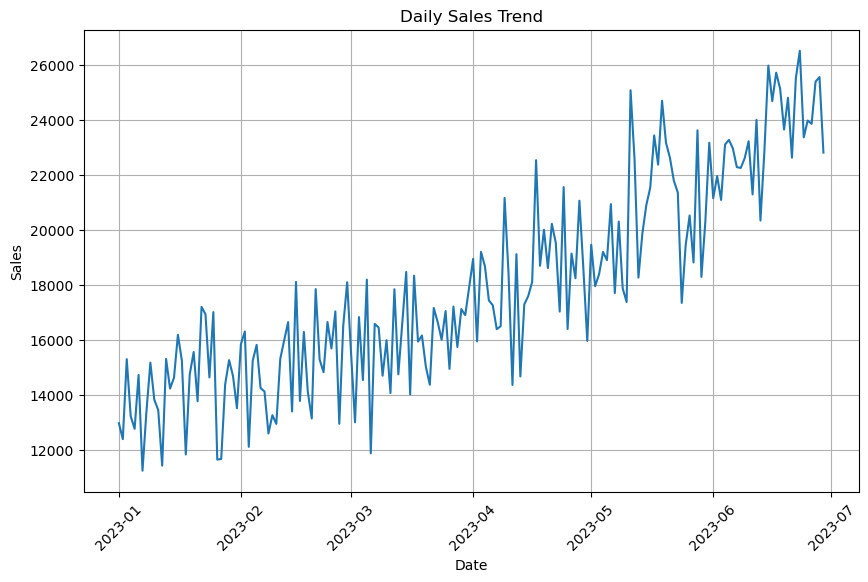

In [23]:
# Mengelompokkan data berdasarkan order_item_created_at dan menghitung total penjualan harian
daily_sales = df.groupby(df['order_item_created_at'].dt.date)['sale_price'].sum().reset_index()

# Membuat plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='order_item_created_at', y='sale_price', data=daily_sales)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

- Berdasarkan hasil grafik "Daily Sales Trend," terlihat bahwa total penjualan harian secara umum mengalami peningkatan seiring berjalannya waktu. Grafik menunjukkan tren naik yang stabil dari waktu ke waktu, yang menunjukkan performa bisnis yang positif dalam hal penjualan produk.

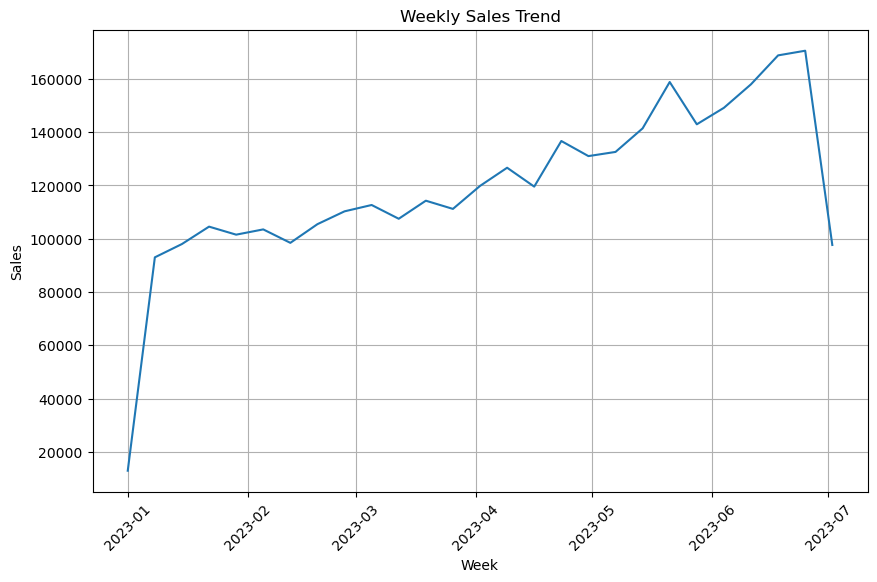

In [24]:
# Mengelompokkan data berdasarkan order_item_created_at dan menghitung total penjualan mingguan
weekly_sales = df.resample('W', on='order_item_created_at')['sale_price'].sum().reset_index()

# Membuat plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='order_item_created_at', y='sale_price', data=weekly_sales)
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

- Berdasarkan hasil grafik "Weekly Sales Trend," terlihat bahwa total penjualan mingguan secara umum mengalami peningkatan seiring berjalannya waktu. Grafik menunjukkan tren naik yang stabil dari minggu ke minggu, yang menunjukkan performa bisnis yang positif dalam hal penjualan produk.

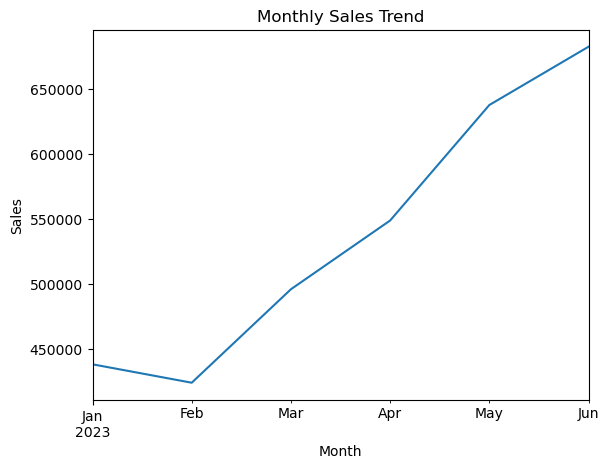

In [25]:
# Tren penjualan bulanan
# Filter data for Q1 - Q2 2023
start_date = '2023-01-01'
end_date = '2023-06-30'
filtered_df = df[(df['order_item_created_at'] >= start_date) & (df['order_item_created_at'] <= end_date)]

monthly_sales = filtered_df.resample('M', on='order_item_created_at')['sale_price'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

- Berdasarkan hasil grafik "Monthly Sales Trend," terlihat bahwa total penjualan bulanan secara umum mengalami peningkatan seiring berjalannya waktu selama periode Q1 - Q2 tahun 2023. Grafik menunjukkan tren naik yang stabil dari bulan ke bulan, yang menandakan adanya performa bisnis yang positif dalam hal penjualan produk.

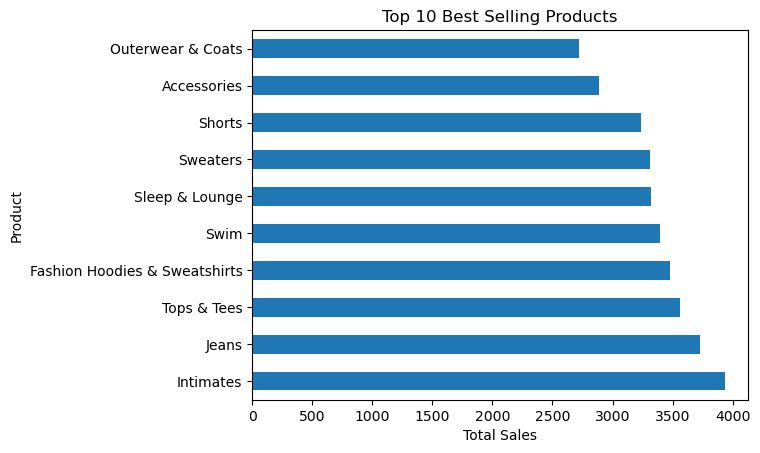

In [26]:
# Produk terlaris
best_selling_products = filtered_df['product_category'].value_counts().head(10)
best_selling_products.plot(kind='barh', title='Top 10 Best Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

- Grafik "Top 10 Best Selling Products" menampilkan daftar produk terlaris berdasarkan total penjualan selama periode Q1 - Q2 tahun 2023. Berdasarkan grafik, dapat disimpulkan bahwa produk-produk berikut adalah yang paling laris di antara pelanggan:
1. Intimates
2. Jeans
3. Tops & Tees
4. Fashion Hoodies & Sweatshirts
5. Swim
6. Sleep & Lounge
7. Sweaters
8. Shorts
9. Accessories
10. Outerwear & Coats
- Produk-produk di atas telah berhasil menarik minat pelanggan dan mencatat penjualan yang tinggi selama periode waktu tersebut. Dengan mengetahui produk-produk yang paling laris, perusahaan dapat fokus pada strategi pemasaran dan persediaan untuk produk-produk tersebut, serta memahami preferensi pelanggan untuk meningkatkan penjualan dan kepuasan pelanggan lebih lanjut.

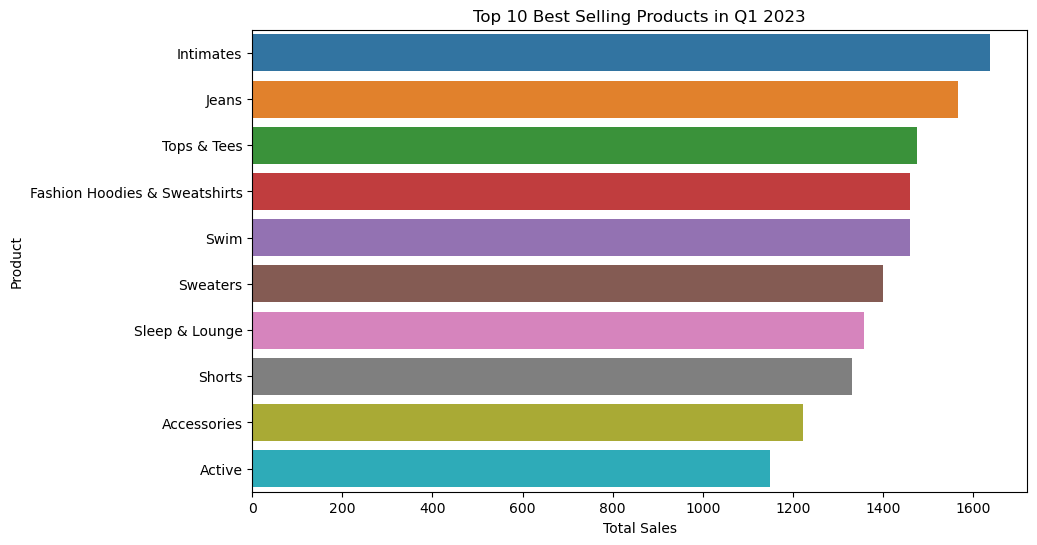

In [27]:
# Memfilter data untuk Q1 2023 (Januari hingga Maret 2023)
q1_2023_data = df[(df['order_item_created_at'].dt.year == 2023) & (df['order_item_created_at'].dt.quarter == 1)]

# Menghitung jumlah penjualan untuk setiap produk
best_selling_products_q1_2023 = q1_2023_data['product_category'].value_counts().head(10)

# Membuat plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=best_selling_products_q1_2023.values, y=best_selling_products_q1_2023.index, orient='h')
plt.title('Top 10 Best Selling Products in Q1 2023')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

- Grafik "Top 10 Best Selling Products in Q1 2023" menampilkan daftar produk terlaris berdasarkan total penjualan selama kuartal pertama tahun 2023 (Januari hingga Maret 2023). Berdasarkan grafik, produk-produk berikut adalah yang paling laris di antara pelanggan selama periode tersebut:
1. Intimates
2. Jeans
3. Tops & Tees
4. Fashion Hoodies & Sweatshirts
5. Swim
6. Sweaters
7. Sleep & Lounge
8. Shorts
9. Accessories
10. Active
- Produk-produk di atas mencatat penjualan tertinggi selama kuartal pertama tahun 2023. Informasi ini dapat membantu perusahaan untuk menilai performa produk mereka dan mengidentifikasi produk yang paling diminati oleh pelanggan selama periode waktu tersebut. Dengan informasi ini, perusahaan dapat membuat strategi pemasaran dan persediaan yang lebih efektif untuk produk-produk yang laris dan berpotensi meningkatkan keuntungan secara keseluruhan.

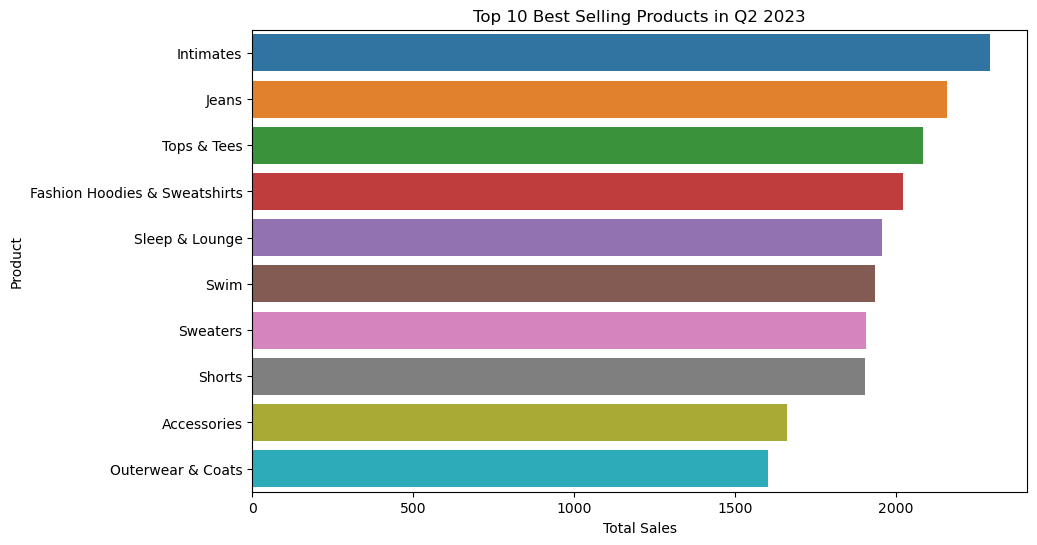

In [28]:
# Memfilter data untuk Q2 2023 (April hingga Juni 2023)
q2_2023_data = df[(df['order_item_created_at'].dt.year == 2023) & (df['order_item_created_at'].dt.quarter == 2)]

# Menghitung jumlah penjualan untuk setiap produk
best_selling_products_q2_2023 = q2_2023_data['product_category'].value_counts().head(10)

# Membuat plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=best_selling_products_q2_2023.values, y=best_selling_products_q2_2023.index, orient='h')
plt.title('Top 10 Best Selling Products in Q2 2023')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

- Grafik "Top 10 Best Selling Products in Q2 2023" menampilkan daftar produk terlaris berdasarkan total penjualan selama kuartal kedua tahun 2023 (April hingga Juni 2023). Berdasarkan grafik, produk-produk berikut adalah yang paling laris di antara pelanggan selama periode tersebut:
1. Intimates
2. Jeans
3. Tops & Tees
4. Fashion Hoodies & Sweatshirts
5. Sleep & Lounge
6. Swim
7. Sweaters
8. Shorts
9. Accessories
10. Outerwear & Coats
- Produk-produk di atas mencatat penjualan tertinggi selama kuartal kedua tahun 2023. Informasi ini dapat membantu perusahaan untuk memantau dan membandingkan performa produk selama periode waktu tertentu. Dengan membandingkan data penjualan antara kuartal pertama dan kuartal kedua, perusahaan dapat mengidentifikasi tren penjualan, mengevaluasi strategi pemasaran, dan mengambil langkah-langkah untuk meningkatkan penjualan produk yang paling diminati oleh pelanggan.

<Figure size 1000x600 with 0 Axes>

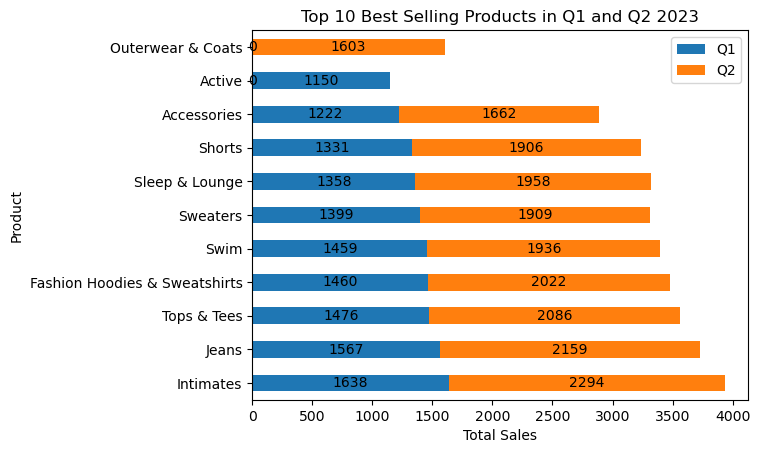

In [29]:
# Memfilter data untuk Q1 dan Q2 2023
q1_data = df[(df['order_item_created_at'].dt.year == 2023) & (df['order_item_created_at'].dt.quarter == 1)]
q2_data = df[(df['order_item_created_at'].dt.year == 2023) & (df['order_item_created_at'].dt.quarter == 2)]

# Menghitung jumlah penjualan untuk setiap produk dalam Q1 dan Q2
best_selling_products_q1 = q1_data['product_category'].value_counts().head(10)
best_selling_products_q2 = q2_data['product_category'].value_counts().head(10)

# Menggabungkan hasil penghitungan penjualan untuk setiap kuartal menjadi satu DataFrame
result_df = pd.concat([best_selling_products_q1, best_selling_products_q2], axis=1, keys=['Q1', 'Q2'])

# Membuat plot Stacked Bar Chart
plt.figure(figsize=(10, 6))
ax = result_df.plot(kind='barh', stacked=True)

# Menambahkan jumlah/angka di chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, y + height / 2, int(width), ha='center', va='center')

plt.title('Top 10 Best Selling Products in Q1 and Q2 2023')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

- Grafik "Top 10 Best Selling Products in Q1 and Q2 2023" menampilkan daftar 10 produk terlaris berdasarkan total penjualan selama kuartal pertama (Q1) dan kuartal kedua (Q2) tahun 2023.
- Grafik ini memberikan gambaran tentang performa penjualan produk terlaris dari Q1 hingga Q2 2023. Produk-produk yang terus mendominasi dalam penjualan adalah "Intimates," "Jeans," dan "Tops & Tees," dengan peningkatan penjualan yang signifikan pada beberapa produk selama kuartal kedua tahun 2023. Informasi ini dapat membantu perusahaan dalam merencanakan strategi pemasaran dan manajemen persediaan untuk produk-produk yang paling diminati oleh pelanggan selama periode waktu tersebut.

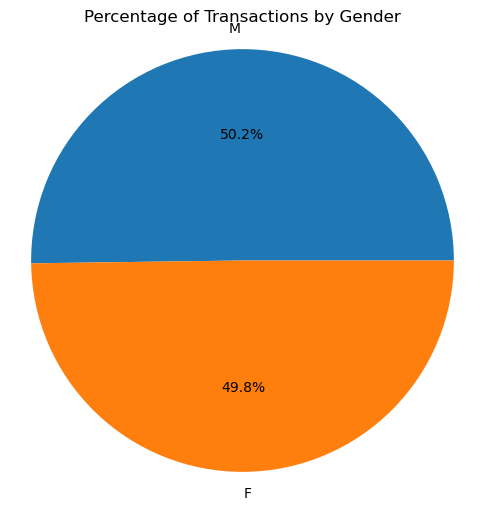

In [30]:
# Menghitung jumlah transaksi untuk masing-masing gender 
transaction_count_by_gender = df['gender'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(transaction_count_by_gender, labels=transaction_count_by_gender.index, autopct='%1.1f%%')
plt.title('Percentage of Transactions by Gender')
plt.axis('equal')  # Membuat lingkaran berbentuk bulat
plt.show()

- Hasil "Percentage of Transactions by Gender" menunjukkan persentase transaksi yang dilakukan oleh masing-masing gender. Berdasarkan pie chart tersebut, terdapat informasi sebagai berikut:
1. Persentase transaksi oleh konsumen perempuan (Female) sebesar 49.8%.
2. Persentase transaksi oleh konsumen laki-laki (Male) sebesar 50.2%.
- Dapat disimpulkan bahwa konsumen laki-laki dan perempuan hampir memiliki kontribusi yang seimbang dalam jumlah transaksi pada periode waktu tertentu. Informasi ini dapat membantu dalam memahami profil pelanggan dan menentukan strategi pemasaran yang lebih tepat untuk kedua gender tersebut.

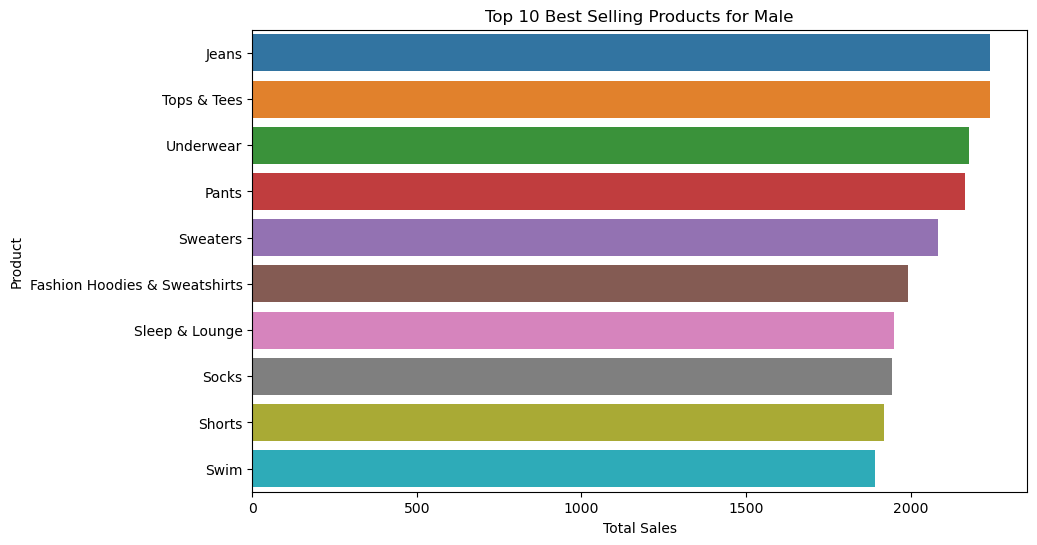

In [31]:
# Memfilter data untuk gender "Male" saja
male_data = df[df['gender'] == 'M']

# Menghitung jumlah penjualan untuk setiap produk berdasarkan gender "Male"
best_selling_products_male = male_data['product_category'].value_counts().head(10)

# Membuat plot Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=best_selling_products_male.values, y=best_selling_products_male.index, orient='h')
plt.title('Top 10 Best Selling Products for Male')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

- Data ini memberikan informasi tentang preferensi pembelian produk laki-laki pada periode waktu tertentu. Produk "Jeans" berada di posisi teratas untuk konsumen laki-laki, menandakan bahwa produk ini diminati selama periode waktu tersebut. Selanjutnya, produk  "Tops & Tees", "Underwear" dan "Pants" juga tetap menunjukkan popularitas yang tinggi di kalangan konsumen laki-laki. Informasi ini dapat membantu bisnis atau toko untuk memahami preferensi pasar dan mengoptimalkan strategi pemasaran serta persediaan produk.

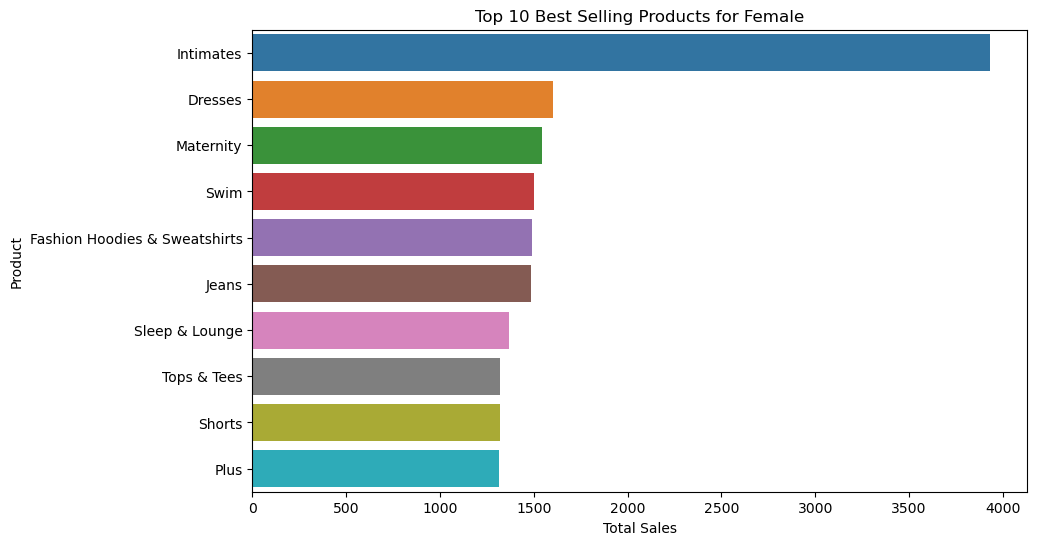

In [32]:
# Memfilter data untuk gender "Female" saja
female_data = df[df['gender'] == 'F']

# Menghitung jumlah penjualan untuk setiap produk berdasarkan gender "Female"
best_selling_products_female = female_data['product_category'].value_counts().head(10)

# Membuat plot Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=best_selling_products_female.values, y=best_selling_products_female.index, orient='h')
plt.title('Top 10 Best Selling Products for Female')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

- Data ini memberikan informasi tentang preferensi pembelian produk perempuan pada periode waktu tertentu. Produk "Intimates" berada di posisi teratas, menandakan bahwa produk ini sangat diminati oleh konsumen perempuan selama periode waktu tersebut. Selanjutnya, produk "Dresses", "Maternity", dan "Swim" juga menunjukkan popularitas yang tinggi di kalangan konsumen perempuan. Informasi ini dapat membantu bisnis atau toko untuk memahami preferensi pasar dan mengoptimalkan strategi pemasaran serta persediaan produk.

<Figure size 1000x600 with 0 Axes>

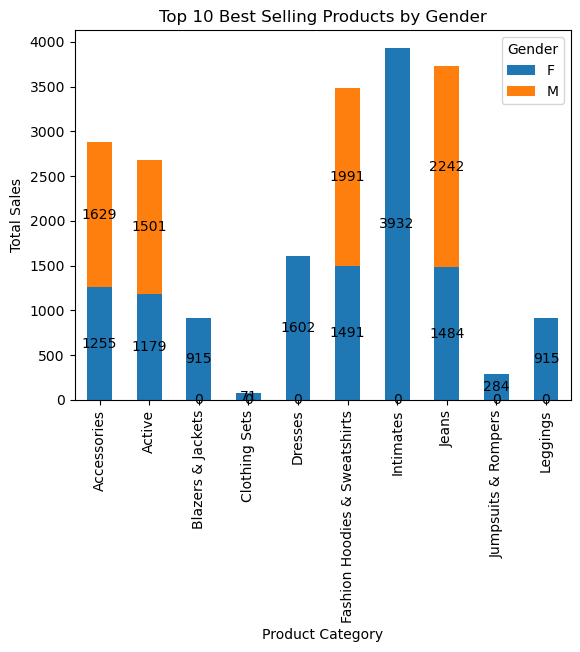

In [33]:
# Memfilter data untuk order_item_created_at di tahun 2023
data = df[(df['order_item_created_at'].dt.year == 2023)]

# Menghitung jumlah penjualan untuk setiap produk berdasarkan gender 
best_selling_products = data.groupby(['product_category', 'gender']).size().unstack().head(10)

# Membuat plot Stacked Bar Chart
plt.figure(figsize=(10, 6))
ax = best_selling_products.plot(kind='bar', stacked=True)

# Menambahkan label pada setiap bagian bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, y + height / 2, int(height), ha='center', va='center')

plt.title('Top 10 Best Selling Products by Gender')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.legend(title='Gender', loc='upper right')
plt.show()

- Dari hasil grafik tersebut, dapat dilihat bahwa beberapa produk memiliki penjualan yang tinggi di salah satu gender, seperti "Intimates" yang memiliki total penjualan sebanyak 3932 untuk gender Female. Dan, terdapat juga produk yang lebih banyak dibeli oleh salah satu gender, contohnya "Fashion Hoodies & Sweatshirts" yang lebih banyak dibeli oleh gender Male (1991) daripada Female (1491).

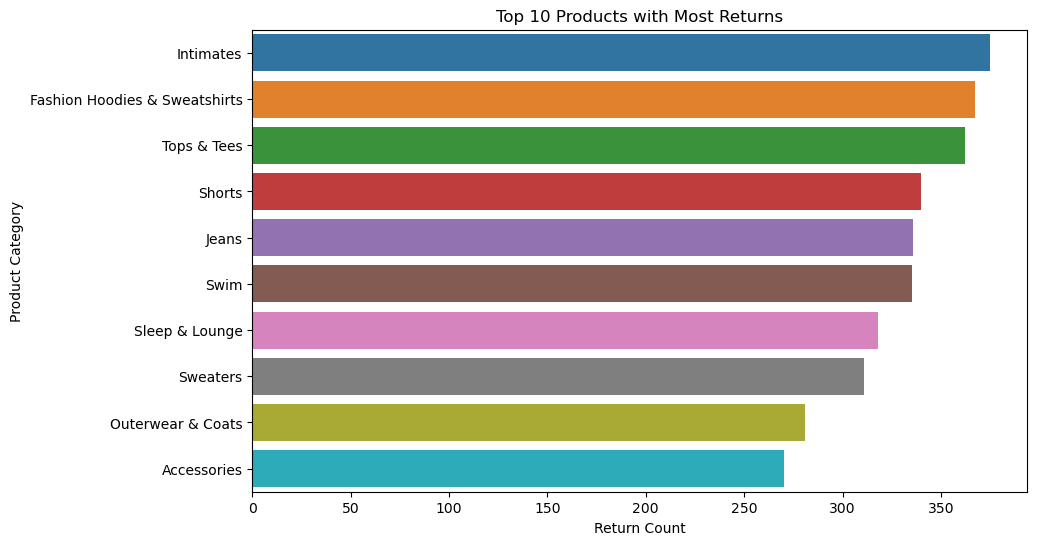

In [34]:
# Filter data untuk produk yang mengalami pengembalian (order_item_status == 'Returned')
returned_products = filtered_df[filtered_df['order_item_status'] == 'Returned']

# Menghitung jumlah pengembalian untuk setiap produk
returned_products_count = returned_products['product_category'].value_counts().head(10)

# Membuat plot menggunakan Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=returned_products_count.values, y=returned_products_count.index, orient='h')
plt.title('Top 10 Products with Most Returns')
plt.xlabel('Return Count')
plt.ylabel('Product Category')
plt.show()


- Berdasarkan data yang telah diolah, produk dengan kategori "Intimates" merupakan produk yang paling sering mengalami pengembalian, diikuti oleh produk "Fashion Hoodies & Sweatshirts" dan "Tops & /tees".

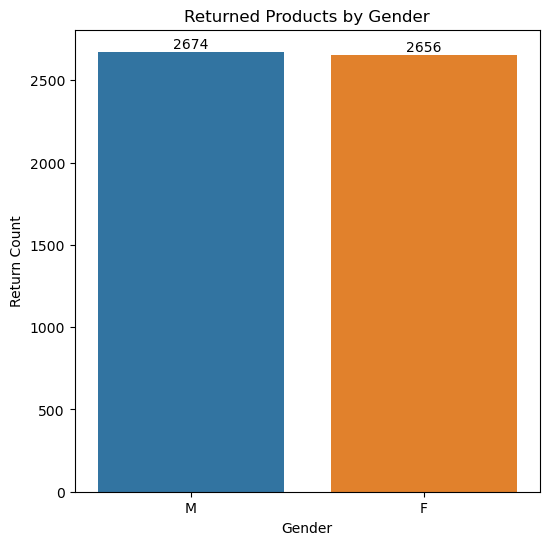

In [35]:
# Filter data untuk produk yang mengalami pengembalian (order_item_status == 'Returned')
returned_products = filtered_df[filtered_df['order_item_status'] == 'Returned']

# Melihat jumlah pengembalian berdasarkan gender
returned_products_by_gender = returned_products['gender'].value_counts()

# Membuat plot menggunakan Bar Chart
plt.figure(figsize=(6, 6))
sns.barplot(x=returned_products_by_gender.index, y=returned_products_by_gender.values)
plt.title('Returned Products by Gender')
plt.xlabel('Gender')
plt.ylabel('Return Count')

# Menampilkan angka pada Bar Chart
for index, value in enumerate(returned_products_by_gender.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()


- Pada visualisasi Bar Chart di atas, kita menampilkan jumlah produk yang mengalami pengembalian (Returned) berdasarkan gender. Berdasarkan data yang telah diolah, terdapat 2674 produk yang dikembalikan oleh pelanggan berjenis kelamin "Male" dan 2656 produk yang dikembalikan oleh pelanggan berjenis kelamin "Female".
- Informasi ini dapat digunakan untuk mengidentifikasi penyebab pengembalian dan mengambil langkah-langkah yang sesuai untuk mengurangi angka pengembalian di masa depan.

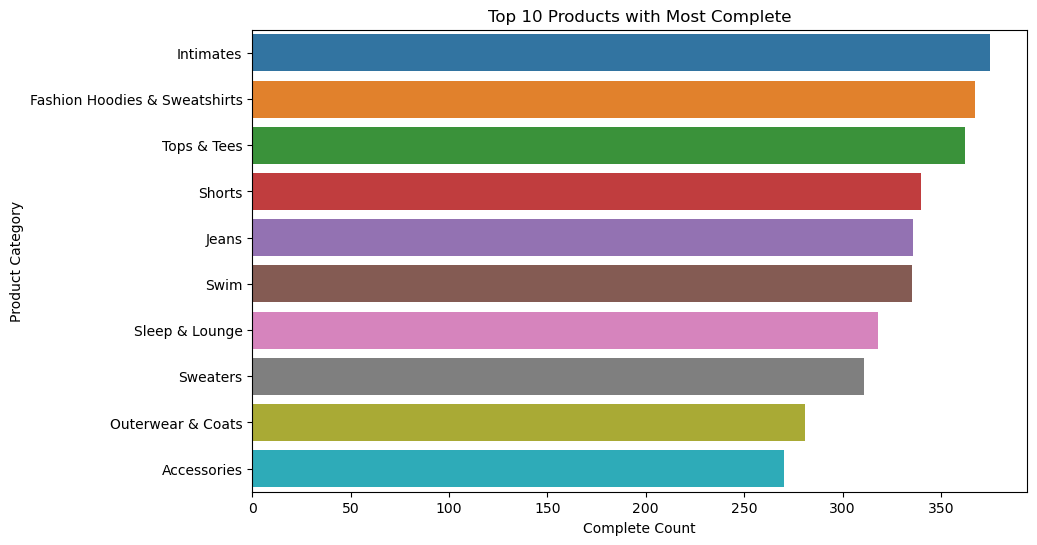

In [36]:
# Filter data untuk produk yang berstatus Complete (order_item_status == 'Complete')
complete_products = filtered_df[filtered_df['order_item_status'] == 'Complete']

# Menghitung jumlah produk dengan status Complete
complete_products_count = returned_products['product_category'].value_counts().head(10)

# Membuat plot menggunakan Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=complete_products_count.values, y=complete_products_count.index, orient='h')
plt.title('Top 10 Products with Most Complete')
plt.xlabel('Complete Count')
plt.ylabel('Product Category')
plt.show()

- Pada visualisasi Bar Chart di atas, menampilkan top 10 produk dengan jumlah pesanan yang telah selesai (Complete) terbanyak. 
- Data tersebut memberikan informasi tentang produk-produk yang paling banyak telah selesai diproses dan dikirimkan kepada pelanggan selama periode waktu yang telah ditentukan (Q1 - Q2 2023). Visualisasi ini membantu dalam mengidentifikasi produk yang paling populer dan memiliki tingkat penyelesaian pesanan yang tinggi.

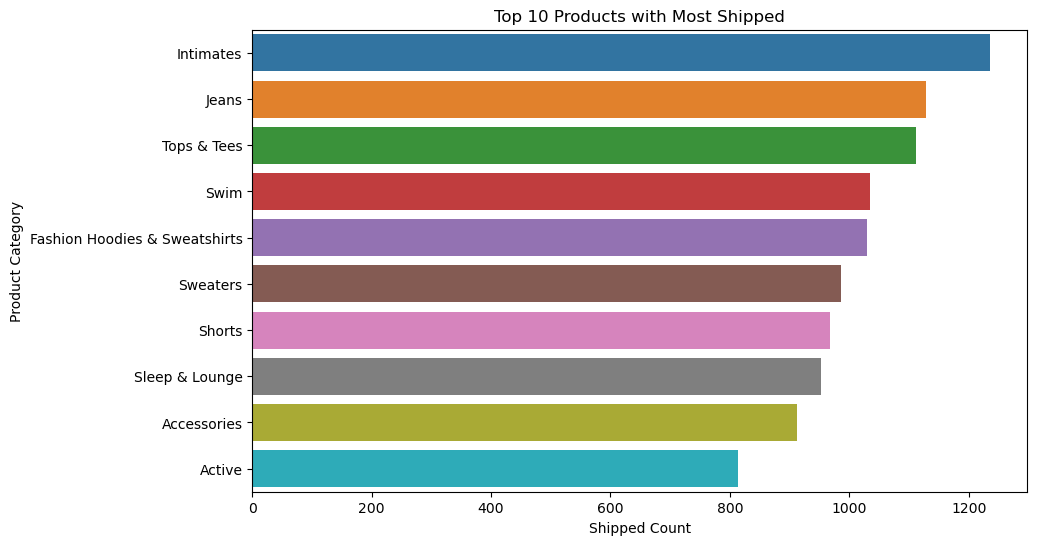

In [37]:
# Filter data untuk produk yang berstatus Shipped (order_item_status == 'Shipped')
shipped_products = filtered_df[filtered_df['order_item_status'] == 'Shipped']

# Menghitung jumlah produk dengan status Shipped
shipped_products_count = shipped_products['product_category'].value_counts().head(10)

# Membuat plot menggunakan Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=shipped_products_count.values, y=shipped_products_count.index, orient='h')
plt.title('Top 10 Products with Most Shipped')
plt.xlabel('Shipped Count')
plt.ylabel('Product Category')
plt.show()

- Visualisasi di atas menampilkan top 10 produk dengan jumlah pengiriman (Shipped) terbanyak. 
- Data tersebut memberikan informasi tentang produk-produk yang paling banyak dikirimkan kepada pelanggan selama periode waktu yang telah ditentukan (Q1 - Q2 2023). Visualisasi ini membantu dalam mengidentifikasi produk yang paling populer dan memiliki permintaan tinggi untuk dikirimkan kepada pelanggan.

# VI. Analisis dan Perhitungan
### Measures of Central Tendency

In [38]:
# Membuat variabel baru 
status_shipped = df[(df["order_item_status"] == "Shipped")]

In [39]:
# Mencari nilai mode, median dan mean pada sale_price dari data status_shipped
print ('Mode: ' + str(status_shipped['sale_price'].mode()[0]))       
print ('Median: ' + str(status_shipped['sale_price'].median()))    
print ('Mean: ' + str(status_shipped['sale_price'].mean()))         

Mode: 25.0
Median: 39.9900016784668
Mean: 59.541283714408955


- Mode merupakan nilai yang paling sering muncul dalam data, dan dalam kasus ini, nilai 25.0 adalah harga produk yang paling sering terjual dengan status 'Shipped'.
- Median merupakan nilai tengah dari data setelah diurutkan secara menaik. Dalam kasus ini, nilai mediannya adalah 39.99, yang menunjukkan bahwa setengah harga produk dengan status 'Shipped' berada di atas nilai tersebut dan setengahnya berada di bawah nilai tersebut.
- Mean merupakan nilai rata-rata dari seluruh data. Dalam kasus ini, nilai rata-ratanya adalah 59.54, yang merupakan nilai total harga produk yang dijual dengan status 'Shipped' dibagi dengan jumlah total produk yang terjual.

### Measure of Variance

In [40]:
# Menghitung nilai range
rg = ['sale_price']
for col in rg:
    print(status_shipped[col].name + ' range: ' + str(status_shipped[col].max() - status_shipped[col].min()))

sale_price range: 998.980000000447


- Hasil perhitungan nilai range menunjukkan nilai selisih antara nilai maksimum dan minimum pada kolom 'sale_price' dari data dengan status 'Shipped'. Pada data tersebut, nilai range untuk kolom 'sale_price' adalah sebesar 998.98.
- Arti dari nilai range ini adalah selisih antara harga produk tertinggi dan terendah yang tercatat dalam data tersebut. Dengan demikian, selisih harga antara produk termahal dan termurah yang telah dikirim (status 'Shipped') adalah 998.98.

In [41]:
# Menghitung nilai variance
(status_shipped['sale_price'].var())

4531.309696232558

- Hasil perhitungan nilai variance menunjukkan nilai sebesar 4531.31 dari kolom 'sale_price' pada data dengan status 'Shipped'. Variance merupakan suatu ukuran yang menggambarkan tingkat variasi atau penyebaran data di sekitar nilai rata-rata. Semakin tinggi nilai variance, semakin besar variasi data dari nilai rata-ratanya.
- Dengan nilai variance sebesar 4531.31, hal ini mengindikasikan bahwa terdapat variasi yang cukup signifikan dalam harga produk yang telah dikirim (status 'Shipped'). Beberapa produk memiliki harga yang jauh berbeda dari nilai rata-rata, sehingga menyebabkan nilai variance menjadi cukup tinggi.

In [42]:
# Menghitung nilai standar deviasi
(status_shipped['sale_price'].std())

67.3150035002046

- Hasil perhitungan nilai standar deviasi menunjukkan nilai sebesar 67.32 dari kolom 'sale_price' pada data dengan status 'Shipped'. Standar deviasi merupakan akar kuadrat dari nilai variance dan digunakan untuk mengukur seberapa jauh nilai-nilai dalam kumpulan data menyebar dari nilai rata-ratanya.
- Dengan nilai standar deviasi sebesar 67.32, hal ini mengindikasikan bahwa harga produk yang telah dikirim (status 'Shipped') memiliki variasi atau penyebaran data yang relatif besar dari nilai rata-ratanya. Beberapa produk memiliki harga yang cukup berbeda dari nilai rata-rata, sehingga menyebabkan nilai standar deviasi menjadi cukup tinggi. Semakin tinggi nilai standar deviasi, semakin besar penyebaran harga produk dalam kategori 'Shipped'.

### Confidence Interval

In [43]:
ci = stats.norm.interval(0.95, status_shipped['sale_price'].mean(), status_shipped['sale_price'].std())
ci

(-72.39369876517972, 191.47626619399765)

- Hasil di atas adalah interval kepercayaan (confidence interval) untuk mean nilai sale price order item dengan status Shipped. Interval kepercayaan ini dihitung dengan tingkat kepercayaan sebesar 95%.
- Artinya, dengan tingkat kepercayaan 95%, kita dapat menyimpulkan bahwa mean nilai sale price order item dengan status Shipped berada dalam rentang tersebut.
- Jadi, hasil confidence interval (CI) ini membantu kita untuk memahami tingkat kepercayaan atau keyakinan kita terhadap estimasi rata-rata nilai sale price order item dengan status Shipped. Rentang confidence interval (CI) ini membantu dalam menggeneralisasi hasil dari sampel ke populasi yang lebih besar, sehingga memberikan gambaran lebih akurat tentang karakteristik nilai sale price pada populasi tersebut.

### Hipotesis Testing

Hipotesis yang digunakan yaitu Hipotesis Testing T-Test 2 Sample 2 Tailed
- Perbandingan antara nilai sale price order item dengan status Shipped di Q1 2023 dengan nilai sale price order item dengan status Shipped di Q2 2023
- Berdasarkan data di atas, Apakah nilai sale price order item dengan status Shipped di Q1 2023 dengan nilai sale price order item dengan status Shipped di Q2 2023 berbeda secara signifikan ?

Berdasarkan data tersebut dapat dibuat hipotesis berupa :
- H0 :
Mean nilai sale price order item dengan status Shipped di Q1 2023 = Mean nilai sale price order item dengan status Shipped di Q2 2023
- H1 :
Mean nilai sale price order item dengan status Shipped di Q1 2023 != Mean nilai sale price order item dengan status Shipped di Q2 2023

In [44]:
# Memfilter data untuk Q1 2023 dengan order_item_status 'Shipped'
q1_2023_shipped = df[(df['order_item_created_at'].dt.year == 2023) & 
                     (df['order_item_created_at'].dt.quarter == 1) &
                     (df['order_item_status'] == 'Shipped')]

# Memfilter data untuk Q2 2023 dengan order_item_status 'Shipped'
q2_2023_shipped = df[(df['order_item_created_at'].dt.year == 2023) & 
                     (df['order_item_created_at'].dt.quarter == 2) &
                     (df['order_item_status'] == 'Shipped')]

# # Menampilkan hasil
# print("Data Shipped di Q1 2023:")
# print(q1_2023_shipped.head())
# print("\nData Shipped di Q2 2023:")
# print(q2_2023_shipped.head())

In [45]:
t_stat,p_val = stats.ttest_ind(q1_2023_shipped['sale_price'], q2_2023_shipped['sale_price'])

print('p-value:',p_val) 
print('t-statistics:',t_stat)

p-value: 0.00018834329440556034
t-statistics: 3.735018839252811


- Berdasarkan hasil p-value yang diperoleh (0.00018834329440556034), jika kita mengambil tingkat signifikansi (alpha) sebesar 0.05 (5%), maka p-value yang lebih kecil dari alpha menunjukkan bahwa perbedaan antara nilai sale price order item dengan status Shipped di Q1 2023 dan nilai sale price order item dengan status Shipped di Q2 2023 adalah signifikan secara statistik.
- Jadi, dengan tingkat signifikansi 5%, kita dapat menolak hipotesis nol (H0) dan menerima hipotesis alternatif (H1) yang menyatakan bahwa mean nilai sale price order item dengan status Shipped di Q1 2023 tidak sama dengan mean nilai sale price order item dengan status Shipped di Q2 2023 secara signifikan.

In [46]:
# Menetapkan kolom 'order_item_created_at' sebagai indeks DataFrame
df.set_index('order_item_created_at', inplace=True)

# Memfilter data untuk Q1 2023
q1_data = df[(df.index.year == 2023) & (df.index.quarter == 1)]

# Menghitung rata-rata penjualan bulanan untuk Q1 2023
monthly_sales_avg_q1 = q1_data.resample('M')['sale_price'].mean()

print("\nRata-rata Penjualan Bulanan di Q1 2023:")
print(monthly_sales_avg_q1)


Rata-rata Penjualan Bulanan di Q1 2023:
order_item_created_at
2023-01-31 00:00:00+00:00    60.058038
2023-02-28 00:00:00+00:00    60.863163
2023-03-31 00:00:00+00:00    59.633364
Freq: M, Name: sale_price, dtype: float64


- Output menampilkan rata-rata penjualan bulanan pada setiap bulan dalam kuartal pertama tahun 2023 (Januari, Februari, dan Maret).

In [47]:
# Memfilter data untuk Q2 2023
q2_data = df[(df.index.year == 2023) & (df.index.quarter == 2)]

# Menghitung rata-rata penjualan bulanan untuk Q2 2023
monthly_sales_avg_q2 = q2_data.resample('M')['sale_price'].mean()

print("\nRata-rata Penjualan Bulanan di Q2 2023:")
print(monthly_sales_avg_q2)


Rata-rata Penjualan Bulanan di Q2 2023:
order_item_created_at
2023-04-30 00:00:00+00:00    61.338664
2023-05-31 00:00:00+00:00    59.705525
2023-06-30 00:00:00+00:00    58.815640
Freq: M, Name: sale_price, dtype: float64


- Hasil di atas menampilkan rata-rata penjualan bulanan pada setiap bulan dalam kuartal kedua tahun 2023. Data ini menunjukkan rata-rata penjualan produk pada bulan April, Mei, dan Juni 2023.

# VII. Kesimpulan


##### -A-
- Berikut adalah hasil dari performa pesanan berdasarkan status (order_item_status) dalam bentuk persentase:
1. Pesanan dengan Status 'Processing' : 19.8%
2. Pesanan dengan Status 'Complete' : 25.2%
3. Pesanan dengan Status 'Shipped' : 30.2%
4. Pesanan dengan Status 'Cancelled' : 14.9%
5. Pesanan dengan Status 'Returned' : 9.9%
- Dari hasil tersebut, dapat dilihat bahwa mayoritas pesanan telah mencapai status 'Shipped', diikuti oleh 'Complete' dan 'Processing'. Sementara itu, persentase pesanan yang dibatalkan ('Cancelled') dan mengalami pengembalian ('Returned') relatif lebih rendah dibandingkan dengan status lainnya.
- Berdasarkan pernyataan tersebut, dapat disimpulkan bahwa kinerja pengiriman (shipping) produk selama tahun 2023 terbilang baik. Mayoritas pesanan berhasil dikirim dan mencapai status 'Shipped', yang merupakan tanda bahwa sebagian besar proses pengiriman berjalan lancar. Selain itu, persentase pesanan yang dibatalkan ('Cancelled') dan mengalami pengembalian ('Returned') juga relatif rendah, menandakan adanya efisiensi dalam proses pengiriman dan minimnya masalah atau kesalahan pengiriman yang mengakibatkan pembatalan atau pengembalian pesanan.
- Namun, untuk mendapatkan gambaran kinerja pengiriman yang lebih komprehensif, perlu juga melihat waktu pengiriman pesanan, tingkat keterlambatan pengiriman, serta tingkat kepuasan pelanggan terhadap layanan pengiriman. Semua faktor tersebut akan memberikan informasi yang lebih lengkap tentang efisiensi dan kualitas kinerja pengiriman produk selama tahun 2023.

##### -B- 
- Tren dan pola penjualan produk selama Q1 - Q2 2023 (harian, mingguan, bulanan) : Berdasarkan hasil grafik tren dan pola penjualan produk selama Q1 - Q2 2023 (harian, mingguan, bulanan) terlihat bahwa penjualan secara umum mengalami peningkatan seiring berjalannya waktu selama periode Q1 - Q2 tahun 2023. Grafik menunjukkan tren naik yang stabil, yang menandakan adanya performa bisnis yang positif dalam hal penjualan produk. Peningkatan penjualan menunjukkan adanya permintaan yang stabil dan potensi pertumbuhan bisnis yang baik. Hal ini dapat dianggap sebagai indikasi keberhasilan strategi penjualan dan pengiriman produk, serta penerimaan produk dari pelanggan. Tetapi, perlu dicatat bahwa grafik tersebut hanya menunjukkan tren penjualan dan tidak memberikan gambaran tentang faktor-faktor spesifik yang mempengaruhi pertumbuhan penjualan, seperti strategi pemasaran, perubahan tren pasar, atau faktor eksternal lainnya.

##### -C- 
- Hasil "Percentage of Transactions by Gender" menunjukkan persentase transaksi yang dilakukan oleh masing-masing gender. Berdasarkan pie chart tersebut, terdapat informasi sebagai berikut:
Persentase transaksi oleh konsumen perempuan (Female) sebesar 49.8%.
Persentase transaksi oleh konsumen laki-laki (Male) sebesar 50.2%. Dapat disimpulkan bahwa konsumen laki-laki dan perempuan hampir memiliki kontribusi yang seimbang dalam jumlah transaksi pada periode waktu tertentu. Informasi ini dapat membantu dalam memahami profil pelanggan dan menentukan strategi pemasaran yang lebih tepat untuk kedua gender tersebut.

- Berdasarkan hasil pembelian produk terlaris berdasarkan kategori produk dan gender (Female dan Male), membantu memberikan gambaran yang lebih jelas tentang preferensi pembelian produk berdasarkan gender. Informasi ini dapat digunakan oleh perusahaan untuk merencanakan strategi pemasaran yang lebih tepat sasaran dan mengoptimalkan persediaan produk agar sesuai dengan permintaan pasar.

- Dengan mengetahui produk-produk yang cenderung sering dikembalikan, perusahaan dapat mengambil langkah-langkah untuk meningkatkan kualitas produk, memberikan informasi yang lebih jelas kepada pelanggan, atau mengoptimalkan proses pengiriman untuk mengurangi tingkat pengembalian. Hal ini akan membantu perusahaan meningkatkan kepuasan pelanggan dan efisiensi bisnis secara keseluruhan

##### -D- 
- Produk yang terus mendominasi dalam penjualan adalah "Intimates. Terdapat beberapa faktor yang kemungkinan mempengaruhi produk "Intimates" banyak dibeli : 
1. Populer dan Trendi: Produk "Intimates" seperti bra, pakaian dalam, dan pakaian tidur mungkin menjadi tren atau populer di kalangan pembeli pada periode waktu tersebut. Perubahan tren mode dan gaya hidup dapat mempengaruhi permintaan terhadap produk tertentu.
2. Kenyamanan dan Fungsionalitas: Produk "Intimates" biasanya didesain untuk memberikan kenyamanan dan fungsionalitas selama penggunaan sehari-hari. Kualitas dan desain yang baik dapat membuat pembeli kembali untuk membeli produk ini.
3. Promosi dan Diskon: Promosi, diskon, atau penawaran khusus yang diberikan oleh toko atau merek tertentu dapat meningkatkan minat pembeli untuk membeli produk "Intimates".
4. Keberagaman Produk: Produk "Intimates" memiliki banyak variasi dan pilihan dalam hal model, ukuran, dan gaya. Ini dapat menarik pembeli dengan preferensi berbeda-beda.
5. Pengaruh Media dan Endorsement: Kampanye pemasaran yang efektif dan adanya pengaruh dari selebriti atau influencer tertentu dapat meningkatkan popularitas dan permintaan produk "Intimates".

##### -E- 
- Berdasarkan hasil analisis, jika kita membandingkan harga penjualan produk dengan status "Shipped" antara kuartal pertama (Q1) dan kuartal kedua (Q2) tahun 2023, ditemukan bahwa ada perbedaan yang signifikan secara statistik. Artinya, rata-rata harga penjualan produk dengan status "Shipped" di Q1 2023 berbeda secara nyata dengan rata-rata harga penjualan produk dengan status "Shipped" di Q2 2023.
- Dengan menggunakan tingkat signifikansi 5%, kita menolak gagasan bahwa perbedaan ini mungkin terjadi secara kebetulan (hipotesis nol) dan menerima bahwa ada perbedaan yang signifikan antara kedua periode tersebut (hipotesis alternatif). Dengan demikian, dapat disimpulkan bahwa harga penjualan produk yang dikirimkan (Shipped) memiliki perbedaan yang penting antara Q1 dan Q2 2023.
